<a href="https://colab.research.google.com/github/vaishakmk/TedTalk-Analysis/blob/main/yasaswi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import defaultdict
import datetime
from pandas.plotting import parallel_coordinates
from scipy.stats import pearsonr
import re

%matplotlib inline

In [6]:
ted_data = pd.read_csv('/content/ted_yash_main.csv')
ted_data.keys()

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [7]:
ted_data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [8]:
def transform_date(date):
    date_info = datetime.date.fromtimestamp(date)
    return date_info
    
ted_data['film_date'] = ted_data['film_date'].apply(transform_date)
ted_data['published_date'] = ted_data['published_date'].apply(transform_date)

ted_data['duration'] = ted_data['duration']/60

ted_data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.400000,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,16.283333,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,21.433333,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",18.600000,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,19.833333,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [9]:
ted_data.dtypes

comments                int64
description            object
duration              float64
event                  object
film_date              object
languages               int64
main_speaker           object
name                   object
num_speaker             int64
published_date         object
ratings                object
related_talks          object
speaker_occupation     object
tags                   object
title                  object
url                    object
views                   int64
dtype: object

In [10]:
pd.isnull(ted_data).sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [11]:
print ("First row with missing value")
for index, row in ted_data.iterrows():
    if pd.isnull(row['speaker_occupation']):
        print (row)
        break
        

First row with missing value
comments                                                            145
description           After a crisis, how can we tell if water is sa...
duration                                                       3.616667
event                                                    TEDGlobal 2011
film_date                                                    2011-07-14
languages                                                            38
main_speaker                                              Sonaar Luthra
name                               Sonaar Luthra: Meet the Water Canary
num_speaker                                                           1
published_date                                               2012-01-16
ratings               [{'id': 10, 'name': 'Inspiring', 'count': 73},...
related_talks         [{'id': 523, 'hero': 'https://pe.tedcdn.com/im...
speaker_occupation                                                  NaN
tags                  ['TED Fellows

In [12]:
ted_data.fillna('Unknown', inplace = True)

pd.isnull(ted_data).sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    0
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [13]:
print (ted_data['languages'][ted_data['languages'] == 0].count())
ted_data[ted_data['languages'] == 0].head()

86


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
58,222,"Two Pilobolus dancers perform ""Symbiosis."" Doe...",13.750000,TED2005,2005-02-25,0,Pilobolus,"Pilobolus: A dance of ""Symbiosis""",1,2007-02-09,"[{'id': 1, 'name': 'Beautiful', 'count': 1810}...","[{'id': 40, 'hero': 'https://pe.tedcdn.com/ima...",Dance company,"['dance', 'entertainment', 'nature', 'performa...","A dance of ""Symbiosis""",https://www.ted.com/talks/pilobolus_perform_sy...,3051507
115,27,The avant-garde string quartet Ethel performs ...,3.566667,TED2006,2006-02-02,0,Ethel,"Ethel: A string quartet plays ""Blue Room""",1,2007-06-18,"[{'id': 1, 'name': 'Beautiful', 'count': 216},...","[{'id': 103, 'hero': 'https://pe.tedcdn.com/im...",String quartet,"['cello', 'collaboration', 'culture', 'enterta...","A string quartet plays ""Blue Room""",https://www.ted.com/talks/ethel_performs_blue_...,384641
135,36,After Vusi Mahlasela's 3-song set at TEDGlobal...,4.983333,TEDGlobal 2007,2007-06-08,0,Vusi Mahlasela,"Vusi Mahlasela: ""Woza""",1,2007-08-21,"[{'id': 8, 'name': 'Informative', 'count': 4},...","[{'id': 158, 'hero': 'https://pe.tedcdn.com/im...","Musician, activist","['Africa', 'entertainment', 'guitar', 'live mu...","""Woza""",https://www.ted.com/talks/vusi_mahlasela_s_enc...,416603
209,67,"Rokia Traore sings the moving ""M'Bifo,"" accomp...",6.983333,TEDGlobal 2007,2007-06-06,0,Rokia Traore,"Rokia Traore: ""M'Bifo""",1,2008-03-27,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 5...","[{'id': 265, 'hero': 'https://pe.tedcdn.com/im...",Singer-songwriter,"['Africa', 'entertainment', 'guitar', 'live mu...","""M'Bifo""",https://www.ted.com/talks/rokia_traore_sings_m...,294936
237,43,"Singer-songwriter Rokia Traore performs ""Kouna...",6.433333,TEDGlobal 2007,2007-06-06,0,Rokia Traore,"Rokia Traore: ""Kounandi""",1,2008-06-05,"[{'id': 22, 'name': 'Fascinating', 'count': 84...","[{'id': 186, 'hero': 'https://pe.tedcdn.com/im...",Singer-songwriter,"['Africa', 'guitar', 'live music', 'music', 's...","""Kounandi""",https://www.ted.com/talks/rokia_traore_sings_k...,82488


In [14]:
ted_data['languages'] = ted_data['languages'].replace(0, 1)

In [15]:
ted_data['Talk_ID'] = range(1, len(ted_data)+1)

In [16]:
rating_names = set()
for index, row in ted_data.iterrows():
    rating = ast.literal_eval(row['ratings'])
    for item in rating:
        rating_names.add(item['name'])
    
print (rating_names)

{'Confusing', 'Unconvincing', 'Obnoxious', 'Inspiring', 'Beautiful', 'Courageous', 'Informative', 'Jaw-dropping', 'OK', 'Fascinating', 'Funny', 'Persuasive', 'Longwinded', 'Ingenious'}


In [17]:
rating_data = defaultdict(list)
for index, row in ted_data.iterrows():
    rating = ast.literal_eval(row['ratings'])
    rating_data['Talk_ID'].append(row['Talk_ID'])
    names = set()
    for item in rating:
        rating_data[item['name']].append(item['count'])
        names.add(item['name'])

rating_data = pd.DataFrame(rating_data)

rating_data.head()

,Talk_ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,1,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,2,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,3,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,4,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,5,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893


In [18]:
rating_data['total'] = rating_data.sum(axis = 1)
rating_data = rating_data.sort_values('total', ascending=False)

In [19]:
def column_percentage(column):
    return (column/rating_data['total'])*100

rating_data.loc[:, (rating_data.columns != 'total') &  (rating_data.columns !='Talk_ID')] = \
    rating_data.loc[:, (rating_data.columns != 'total') &  (rating_data.columns !='Talk_ID')].apply(column_percentage)

print (rating_data.head())

      Talk_ID      Funny  Beautiful  Ingenious  Courageous  Longwinded  \
0           1  20.932116   4.872617   6.470895    3.466132    0.412356   
201       202   1.363117  13.316494   1.732823   11.065799    0.561615   
1346     1347   1.393449   4.801307   2.121370    9.366412    0.502117   
837       838   8.577385  13.037626   1.795916   13.592488    0.464574   
677       678   0.678768   2.854308   5.940094    2.020642    0.678768   

      Confusing  Informative  Fascinating  Unconvincing  Persuasive  \
0      0.257856     7.827301    11.274254      0.319656   11.405313   
201    0.407806     7.662241    20.386075      0.776102    2.404504   
1346   0.292654    14.539107    16.505979      0.497660    9.235683   
837    0.254449     7.487360     7.613763      0.382494    5.762033   
677    0.194928    11.486851    12.948814      1.618602   15.394121   

      Jaw-dropping        OK  Obnoxious  Inspiring  total  
0         4.729838  1.250919   0.222693  26.556989  93851  
201     

In [20]:
tags_data = defaultdict(list)
for index, row in ted_data.iterrows():
    themes = ast.literal_eval(row['tags'])
    for item in themes:
        tags_data['Talk_ID'].append(row['Talk_ID'])
        tags_data['tags'].append(item)

tags_data = pd.DataFrame(tags_data)

print (len(tags_data))
print (len(tags_data['tags'].unique()))
tags_data.head()

19154
416


,Talk_ID,tags
0,1,children
1,1,creativity
2,1,culture
3,1,dance
4,1,education


In [23]:
count_talks = defaultdict(list)
for rating in rating_data.columns:
    if (rating != 'Talk_ID') & (rating != 'total'):
        count_talks['rating'].append(rating) 
        count_talks['count'].append(rating_data[rating_data[rating] >0][rating].count())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

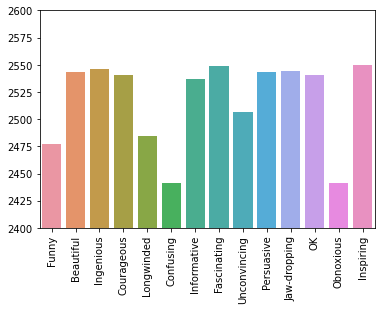

In [24]:
sns.barplot(x="rating", y="count", data=count_talks)
plt.ylim(2400, 2600)
plt.xticks(rotation='vertical')